In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Set font to match Latex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})

In [3]:
df = pd.read_csv('life_expectancy.csv') 
df

Country  Year  Mean Years of Schooling, female (years)  \
0     Afghanistan  1990                                 0.342503   
1     Afghanistan  1991                                 0.371860   
2     Afghanistan  1992                                 0.401218   
3     Afghanistan  1993                                 0.430575   
4     Afghanistan  1994                                 0.459933   
...           ...   ...                                      ...   
6203     Zimbabwe  2017                                 8.061880   
6204     Zimbabwe  2018                                 8.178377   
6205     Zimbabwe  2019                                 8.296558   
6206     Zimbabwe  2020                                 8.296558   
6207     Zimbabwe  2021                                 8.296558   

      Share of seats in parliament, male (% held by men)  \
0                                                   NaN    
1                                                   NaN    
2                                                   NaN    
3                                                   NaN    
4                                                   NaN    
...                                                 ...    
6203                                          63.848396    
6204                                          65.714286    
6205                                          65.428571    
6206                                          65.428571    
6207                                          65.428571    

      Mean Years of Schooling (years)  Inequality in income  \
0                            0.971125                   NaN   
1                            1.019356                   NaN   
2                            1.067586                   NaN   
3                            1.115817                   NaN   
4                            1.164047                   NaN   
...                               ...                   ...   
6203                         8.461690              27.01627   
6204                         8.585395              27.01627   
6205                         8.710909              28.76901   
6206                         8.710909              28.76901   
6207                         8.710909              28.76901   

      Carbon dioxide emissions per capita (production) (tonnes)  \
0                                              0.209727           
1                                              0.182525           
2                                              0.095233           
3                                              0.084285           
4                                              0.075054           
...                                                 ...           
6203                                           0.673026           
6204                                           0.821010           
6205                                           0.747610           
6206                                           0.708562           
6207                                           0.708562           

      Expected Years of Schooling, male (years)  \
0                                      3.939093   
1                                      4.171640   
2                                      4.417915   
3                                      4.678730   
4                                      4.954942   
...                                         ...   
6203                                  12.039037   
6204                                  12.154317   
6205                                  12.270700   
6206                                  12.270700   
6207                                  12.270700   

      Expected Years of Schooling (years)  \
0                                2.504050   
1                                2.806550   
2                                3.109050   
3                                3.411550   
4                                3.714050   
...                        

In [4]:
df.columns = df.columns.str.lower()
# Dictionary mapping old column names to new column names
column_rename_dict = {
    'country': 'country',
    'year': 'year',
    'mean years of schooling, female (years)': 'mean_years_of_schooling_female',
    'share of seats in parliament, male (% held by men)': 'share_of_male_seats_in_parliament',
    'mean years of schooling (years)': 'mean_years_of_schooling',
    'inequality in income': 'income_inequality',
    'carbon dioxide emissions per capita (production) (tonnes)': 'co2_emissions_per_capita_tonnes',
    'expected years of schooling, male (years)': 'expected_years_of_schooling_male',
    'expected years of schooling (years)': 'expected_years_of_schooling',
    'labour force participation rate, female (% ages 15 and older)': 'female_labour_force_participation_rate',
    'population with at least some secondary education, female (% ages 25 and older)': 'female_population_with_some_secondary_education',
    'expected years of schooling, female (years)': 'expected_years_of_schooling_female',
    'adolescent birth rate (births per 1,000 women ages 15-19)': 'adolescent_birth_rate_per_1000_women_ages_15_19',
    'material footprint per capita (tonnes)': 'material_footprint_per_capita_tonnes',
    'mean years of schooling, male (years)': 'mean_years_of_schooling_male',
    'population with at least some secondary education, male (% ages 25 and older)': 'male_population_with_some_secondary_education',
    'share of seats in parliament, female (% held by women)': 'share_of_female_seats_in_parliament',
    'inequality in eduation': 'education_inequality',
    'gender development index (value)': 'gender_development_index',
    'coefficient of human inequality': 'coefficient_of_human_inequality',
    'labour force participation rate, male (% ages 15 and older)': 'male_labour_force_participation_rate',
    'human development index (value)': 'human_development_index',
    'gross national income per capita (2017 ppp$)': 'gross_national_income_per_capita_2017_ppp',
    'total population, as of 1 january (thousands)': 'total_population_as_of_january_1st_thousands',
    'total population, as of 1 july (thousands)': 'total_population_as_of_july_1st_thousands',
    'male population, as of 1 july (thousands)': 'male_population_as_of_july_1st_thousands',
    'female population, as of 1 july (thousands)': 'female_population_as_of_july_1st_thousands',
    'population density, as of 1 july (persons per square km)': 'population_density_as_of_july_1st_persons_per_square_km',
    'population sex ratio, as of 1 july (males per 100 females)': 'population_sex_ratio_as_of_july_1st_males_per_100_females',
    'median age, as of 1 july (years)': 'median_age_as_of_july_1st_years',
    'natural change, births minus deaths (thousands)': 'natural_change_births_minus_deaths_thousands',
    'rate of natural change (per 1,000 population)': 'rate_of_natural_change_per_1000_population',
    'population change (thousands)': 'population_change_thousands',
    'population growth rate (percentage)': 'population_growth_rate_percentage',
    'population annual doubling time (years)': 'population_annual_doubling_time_years',
    'births (thousands)': 'births_thousands',
    'births by women aged 15 to 19 (thousands)': 'births_by_women_aged_15_to_19_thousands',
    'crude birth rate (births per 1,000 population)': 'crude_birth_rate_births_per_1000_population',
    'total fertility rate (live births per woman)': 'total_fertility_rate_live_births_per_woman',
    'net reproduction rate (surviving daughters per woman)': 'net_reproduction_rate_surviving_daughters_per_woman',
    'mean age childbearing (years)': 'mean_age_of_childbearing_years',
    'sex ratio at birth (males per 100 female births)': 'sex_ratio_at_birth_males_per_100_female_births',
    'total deaths (thousands)': 'total_deaths_thousands',
    'male deaths (thousands)': 'male_deaths_thousands',
    'female deaths (thousands)': 'female_deaths_thousands',
    'crude death rate (deaths per 1,000 population)': 'crude_death_rate_deaths_per_1000_population',
    'life expectancy at birth, both sexes (years)': 'life_expectancy_at_birth_both_sexes_years',
    'live births surviving to age 1 (thousands)': 'live_births_surviving_to_age_1_thousands',
    'net number of migrants (thousands)': 'net_number_of_migrants_thousands',
    'net migration rate (per 1,000 population)': 'net_migration_rate_per_1000_population'
}

# Rename columns
df_new = df.copy()
df_new = df.rename(columns=column_rename_dict, errors='raise')


In [5]:
df_new.isnull().sum().to_csv('desc_groupby_country.csv')

In [6]:
null_counts = df_new.groupby('country').apply(lambda x: x.isnull().sum())

null_counts_per_country = null_counts.sum(axis=1)
null_counts_per_country.sort_values(ascending=False).iloc[0:20]

country
Monaco                   591
San Marino               510
Nauru                    494
Micronesia               464
Somalia                  441
North Korea              440
Antigua and Barbuda      431
Dominica                 428
Marshall Islands         419
Saint Kitts and Nevis    403
Grenada                  399
Liechtenstein            392
Palau                    386
Andorra                  364
Kiribati                 354
Vanuatu                  341
Equatorial Guinea        326
Solomon Islands          319
South Sudan              314
Seychelles               313
dtype: int64

In [7]:
label_encoder_df = LabelEncoder()

df_new["country_id"] = label_encoder_df.fit_transform(df_new["country"])
df_new = df_new.set_index("country", append=True)

y_col = ["life_expectancy_at_birth_both_sexes_years"]
x_col =[col for col in df_new.columns.to_list() if col not in y_col]

print(x_col)

['year', 'mean_years_of_schooling_female', 'share_of_male_seats_in_parliament', 'mean_years_of_schooling', 'income_inequality', 'co2_emissions_per_capita_tonnes', 'expected_years_of_schooling_male', 'expected_years_of_schooling', 'female_labour_force_participation_rate', 'female_population_with_some_secondary_education', 'expected_years_of_schooling_female', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'material_footprint_per_capita_tonnes', 'mean_years_of_schooling_male', 'male_population_with_some_secondary_education', 'share_of_female_seats_in_parliament', 'education_inequality', 'gender_development_index', 'coefficient_of_human_inequality', 'male_labour_force_participation_rate', 'human_development_index', 'gross_national_income_per_capita_2017_ppp', 'total_population_as_of_january_1st_thousands', 'total_population_as_of_july_1st_thousands', 'male_population_as_of_july_1st_thousands', 'female_population_as_of_july_1st_thousands', 'population_density_as_of_july_1st_persons_per

In [8]:
def drop_countries_missing_values(df, threshold=0.6):

    # Count total rows per country
    total_rows_per_country = df.groupby(level='country').size()

    # Count missing values per country
    missing_values_per_country = df.groupby(level='country')['expected_years_of_schooling'].apply(lambda x: x.isnull().sum())

    # Calculate threshold count per country
    threshold_count_per_country = total_rows_per_country * threshold

    # Filter countries based on the threshold
    countries_to_drop = missing_values_per_country[missing_values_per_country > threshold_count_per_country].index.tolist()

    # Filter countries where more than half of the total rows have missing values
    countries_to_drop = [country for country in countries_to_drop if missing_values_per_country[country] > total_rows_per_country[country] / 2]

    # Drop countries from the DataFrame
    df_filtered = df.drop(countries_to_drop, level='country')

    return df_filtered, countries_to_drop

In [9]:
df_filtered, dropped_countries = drop_countries_missing_values(df_new)
print("Dropped countries:", dropped_countries)

Dropped countries: ['Monaco', 'North Korea', 'San Marino', 'Somalia', 'South Sudan']


In [10]:
df_filtered = df_filtered.drop('Nauru', level='country')

In [11]:
df_filtered = df_filtered.drop('Marshall Islands', level='country')

In [12]:
df_filtered = df_filtered.drop('Vanuatu', level='country')

In [13]:
df_filtered = df_filtered.drop(df_filtered[(df_filtered['country_id'] == 143) & (df_filtered['year'] == 1994)].index)

In [14]:
df_filtered.to_csv('filtered.csv')

In [15]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(df_filtered[x_col], df_filtered[y_col], test_size=0.2, random_state=42, stratify=df_filtered['country_id'])

In [16]:
# Helper functions
def count_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])
    return missing_values_df


def fill_missing(group):
    if group.isnull().any():
        filled_fw = group.ffill()
        filled_bw = group.bfill()
        mean_values = (filled_fw + filled_bw) / 2
        print(mean_values)
        group_filled = group.fillna(mean_values)
        return group_filled
    else:
        return group


def estimate_missing_values_grouped(df_group, variables):
    # Calculate growth rates based on existing values
    df_group = df_group.sort_values(by="year", axis=0)
    
    for var in list(df_group.columns):
        df_group[f"growth_rate_{var}"] = df_group[var].pct_change()
    
        # Replace NaN growth rates with 0
        df_group[f"growth_rate_{var}"].fillna(0, inplace=True)
    
        # Calculate average growth rate
        avg_growth_rate = df_group.loc[df_group[f"growth_rate_{var}"] != 0, [f"growth_rate_{var}"]].mean()
    
        # Fill missing values using the average growth rate
        for i in range(len(df_group)-2, -1, -1):
            if pd.isna(df_group.at[df_group.index[i], var]):
                df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
    
        # Drop Growth Rate column
        df_group.drop(columns=[f"growth_rate_{var}"], inplace=True)
    
    return df_group

In [17]:
X_train_filled_avg = X_train.groupby('country_id').apply(estimate_missing_values_grouped, variables=(['expected_years_of_schooling']))

X_train_filled_avg.to_csv('xtrain_avg.csv')

/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_group[f"growth_rate_{var}"] = df_group[var].pct_change()
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_gro

In [18]:

X_train_filled = X_train.groupby('country').apply(estimate_missing_values_grouped, variables=(['expected_years_of_schooling']))
X_test_filled = X_test.groupby('country').apply(estimate_missing_values_grouped, variables=(['expected_years_of_schooling']))


# Combine results into one DataFrame if not empty
X_train_filled = X_train_filled.reset_index(level=0, drop=True)
X_train_filled = pd.concat([X_train_filled], axis=1)
X_test_filled = X_test_filled.reset_index(level=0, drop=True)
X_test_filled = pd.concat([X_test_filled], axis=1)

X_train_filled_new = X_train
X_test_filled_new = X_test

# Fill remaining missing values
X_train_filled_new['expected_years_of_schooling'] = X_train_filled['expected_years_of_schooling'].fillna(X_train_filled['expected_years_of_schooling'].mean())
X_test_filled_new['expected_years_of_schooling'] = X_test_filled['expected_years_of_schooling'].fillna(X_train_filled['expected_years_of_schooling'].mean())

# Save null counts per group to CSV
X_train_filled.isnull().sum().to_csv('desc_groupby_country_filled.csv')

X_train_filled.to_csv('xtrainfilled.csv')

/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_group[f"growth_rate_{var}"] = df_group[var].pct_change()
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_gro

#### Correlation (Q2)

In [19]:
corrs = {x: X_train[x].corr(y_train[y_col[0]], method='pearson') for x in x_col}
corrs_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Pearson Correlation'])
corrs_df = corrs_df.sort_values(by='Pearson Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
halfs = corrs_df[(corrs_df['Pearson Correlation'] >=0.5) | (corrs_df['Pearson Correlation']<=-0.5)]
halfs

Pearson Correlation
human_development_index                                        0.917845
expected_years_of_schooling_female                             0.821080
expected_years_of_schooling                                    0.803148
median_age_as_of_july_1st_years                                0.790597
expected_years_of_schooling_male                               0.787426
mean_years_of_schooling_female                                 0.749408
mean_years_of_schooling                                        0.739887
mean_years_of_schooling_male                                   0.727694
female_population_with_some_secondary_education                0.691862
male_population_with_some_secondary_education                  0.654386
gross_national_income_per_capita_2017_ppp                      0.647725
gender_development_index                                       0.602127
material_footprint_per_capita_tonnes                           0.592853
crude_death_rate_deaths_per_1000_population                   -0.602486
education_inequality                                          -0.689232
rate_of_natural_change_per_1000_population                    -0.711782
net_reproduction_rate_surviving_daughters_per_w...            -0.774101
adolescent_birth_rate_per_1000_women_ages_15_19               -0.798498
total_fertility_rate_live_births_per_woman                    -0.841351
coefficient_of_human_inequality                               -0.850249
crude_birth_rate_births_per_1000_population                   -0.866114

We can drop the variable ```human_development_index``` as it is a function of life expectancy at birth, education, and other variables and therefore doesn't have any real causality to the life expectancy at birth variable. We can use ```expected_years_of_schooling``` as there may be causality (we can drop the female and male tagged versions of the variable).

## Linear Regression
OLS model with ```expected_years_of_schooling``` as the dependent variable to predice LEB (Life Expectancy at Birth)

In [20]:
reg = LinearRegression().fit(X_train_filled_new[['expected_years_of_schooling']], y_train)
score = reg.score(X_train_filled_new[['expected_years_of_schooling']], y_train)
coef = reg.coef_
intercept = reg.intercept_


table_data = [
    ["Score", "Coefficient", "Intercept"],
    [score, coef[0], intercept]
]

# Create a DataFrame
data_table = pd.DataFrame(table_data[1:], columns=table_data[0])

latex_table_eh = data_table.to_latex()

# Save LaTeX code to a .tex file
with open('datatable.tex', 'w') as f:
    f.write(latex_table_eh)


In [21]:
X_train_filled_new[['expected_years_of_schooling']]

expected_years_of_schooling
     country                                 
4133 Netherlands                    16.727760
1843 Fiji                           14.172435
4268 New Zealand                    17.648484
2837 Kazakhstan                     14.827940
4114 Nicaragua                      10.774207
...                                       ...
400  Belgium                        18.942671
5833 Uruguay                        13.888350
2365 Honduras                       10.132814
223  Armenia                        13.116760
1295 Costa Rica                     12.433711

[4760 rows x 1 columns]

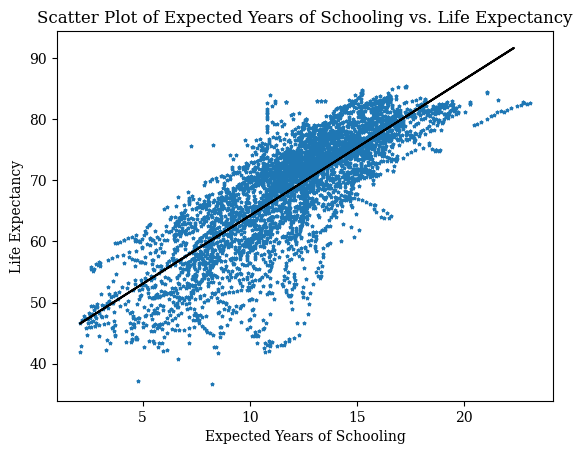

In [22]:
y_pred = reg.predict(X_test[['expected_years_of_schooling']])

# Scatter plot
plt.scatter(X_train_filled_new[['expected_years_of_schooling']], y_train[y_col[0]], s=5, marker='*')
plt.xlabel('Expected Years of Schooling')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Expected Years of Schooling vs. Life Expectancy')


plt.plot(X_test_filled_new[['expected_years_of_schooling']], y_pred, color='black')

plt.savefig("scatterplot.pdf")

In [23]:
y_pred.shape
#y_test[y_col[0]].shape

(1191, 1)

In [24]:
y_pred = y_pred.flatten()

correlation = np.corrcoef(y_pred, y_test[y_col[0]])[0, 1]
mse = mean_squared_error(y_test[y_col[0]], y_pred)

print(f"correlation: {correlation}, mse: {mse}")

correlation: 0.8121922766612814, mse: 30.234182452160017


### Spearman Correlation to assess monotonic and non-linear relationship (Q3)

In [25]:
corrs_sm = {x: X_train[x].corr(y_train[y_col[0]], method='spearman') for x in x_col}
corrs_sm_df = pd.DataFrame.from_dict(corrs_sm, orient='index', columns=['Spearman Correlation'])
corrs_sm_df = corrs_sm_df.sort_values(by='Spearman Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
halfs_sm = corrs_sm_df[(corrs_sm_df['Spearman Correlation'] >= 0.5) | (corrs_sm_df['Spearman Correlation']<= -0.5)]
halfs_sm

Spearman Correlation
human_development_index                                         0.927858
gross_national_income_per_capita_2017_ppp                       0.860789
median_age_as_of_july_1st_years                                 0.858644
expected_years_of_schooling_female                              0.838362
expected_years_of_schooling                                     0.819680
expected_years_of_schooling_male                                0.811098
material_footprint_per_capita_tonnes                            0.785607
co2_emissions_per_capita_tonnes                                 0.756555
mean_years_of_schooling_female                                  0.747328
mean_years_of_schooling                                         0.739098
mean_years_of_schooling_male                                    0.732379
female_population_with_some_secondary_education                 0.694362
male_population_with_some_secondary_education                   0.651657
gender_development_index                                        0.598921
population_annual_doubling_time_years                           0.509071
population_growth_rate_percentage                              -0.502495
education_inequality                                           -0.674915
rate_of_natural_change_per_1000_population                     -0.743499
net_reproduction_rate_surviving_daughters_per_w...             -0.781616
adolescent_birth_rate_per_1000_women_ages_15_19                -0.804904
total_fertility_rate_live_births_per_woman                     -0.817291
coefficient_of_human_inequality                                -0.832388
crude_birth_rate_births_per_1000_population                    -0.847872

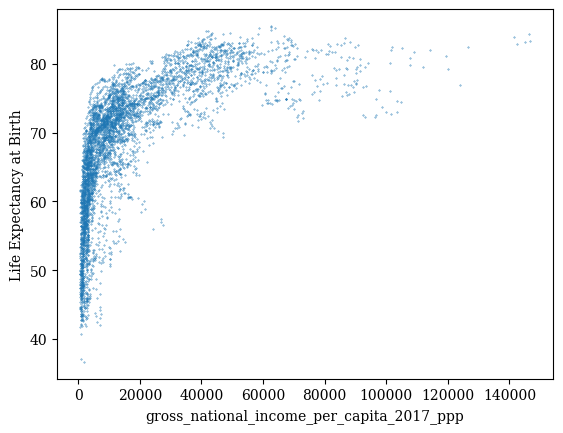

In [26]:
variable = 'gross_national_income_per_capita_2017_ppp'

# test log transformation for a linear relationship
X_train[f"{variable}_log"] = np.log(X_train[variable])
X_test[f"{variable}_log"] = np.log(X_test[variable])

plt.scatter(X_train[variable], y_train, s=0.1)
plt.xlabel(f"{variable}")
plt.ylabel('Life Expectancy at Birth')
plt.show()

In [27]:
corr_old = halfs.loc[variable]['Pearson Correlation']
corr_new = X_train[f"{variable}_log"].corr(y_train[y_col[0]], method='pearson')
print(f""" 
    Variable: {variable}
    Pearson Correlation (old): {corr_old}
    Pearson Correlation (new): {corr_new}
""")

 
    Variable: gross_national_income_per_capita_2017_ppp
    Pearson Correlation (old): 0.6477253731837471
    Pearson Correlation (new): 0.8314210127547368



### Multiple Linear Regression (Q4)

In [28]:
new_corrs = {x: X_train[x].corr(y_train[y_col[0]], method='pearson') for x in X_train.columns}
new_corrs_df = pd.DataFrame.from_dict(new_corrs, orient='index', columns=['Pearson Correlation'])
new_corrs_df = new_corrs_df.sort_values(by='Pearson Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
new_halfs = new_corrs_df[(new_corrs_df['Pearson Correlation'] >= 0.5) | (new_corrs_df['Pearson Correlation']<=-0.5)]
new_halfs

Pearson Correlation
human_development_index                                        0.917845
gross_national_income_per_capita_2017_ppp_log                  0.831421
expected_years_of_schooling_female                             0.821080
expected_years_of_schooling                                    0.803148
median_age_as_of_july_1st_years                                0.790597
expected_years_of_schooling_male                               0.787426
mean_years_of_schooling_female                                 0.749408
mean_years_of_schooling                                        0.739887
mean_years_of_schooling_male                                   0.727694
female_population_with_some_secondary_education                0.691862
male_population_with_some_secondary_education                  0.654386
gross_national_income_per_capita_2017_ppp                      0.647725
gender_development_index                                       0.602127
material_footprint_per_capita_tonnes                           0.592853
crude_death_rate_deaths_per_1000_population                   -0.602486
education_inequality                                          -0.689232
rate_of_natural_change_per_1000_population                    -0.711782
net_reproduction_rate_surviving_daughters_per_w...            -0.774101
adolescent_birth_rate_per_1000_women_ages_15_19               -0.798498
total_fertility_rate_live_births_per_woman                    -0.841351
coefficient_of_human_inequality                               -0.850249
crude_birth_rate_births_per_1000_population                   -0.866114

In [39]:
undesired_variables = ['expected_years_of_schooling', 'expected_years_of_schooling_female',
 'expected_years_of_schooling_male', 'mean_years_of_schooling_female', 'mean_years_of_schooling_male', 'mean_years_of_schooling', 'coefficient_of_human_inequality']

necessary_variables = ['country', 'year']

# Creating variable subsets
positive_corr_variables = [index for index, row in new_halfs.iterrows() if row['Pearson Correlation'] > 0.75 and index not in undesired_variables]
negative_corr_variables = [index for index, row in new_halfs.iterrows() if row['Pearson Correlation'] < -0.75 and index not in undesired_variables]
absolute_corr_variables = [index for index, row in new_halfs.iterrows() if abs(row['Pearson Correlation']) > 0.70 and index not in undesired_variables]

In [40]:
print(f"Subset 1: {positive_corr_variables}")
print(f"Subset 2: {negative_corr_variables}")
print(f"Subset 3: {absolute_corr_variables}")

X_train[absolute_corr_variables].isnull().to_csv("missinvalues.csv")


Subset 1: ['human_development_index', 'gross_national_income_per_capita_2017_ppp_log', 'median_age_as_of_july_1st_years']
Subset 2: ['net_reproduction_rate_surviving_daughters_per_woman', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'total_fertility_rate_live_births_per_woman', 'crude_birth_rate_births_per_1000_population']
Subset 3: ['human_development_index', 'gross_national_income_per_capita_2017_ppp_log', 'median_age_as_of_july_1st_years', 'rate_of_natural_change_per_1000_population', 'net_reproduction_rate_surviving_daughters_per_woman', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'total_fertility_rate_live_births_per_woman', 'crude_birth_rate_births_per_1000_population']


In [41]:
# Positive subset
X_train_pos = X_train.groupby('country').apply(estimate_missing_values_grouped, variables=(positive_corr_variables))
X_test_pos = X_test.groupby('country').apply(estimate_missing_values_grouped, variables=(positive_corr_variables))

# Negative subset
X_train_neg = X_train.groupby('country').apply(estimate_missing_values_grouped, variables=(negative_corr_variables))
X_test_neg = X_test.groupby('country').apply(estimate_missing_values_grouped, variables=(negative_corr_variables))

# Absolute
X_train_abs = X_train.groupby('country').apply(estimate_missing_values_grouped, variables=(absolute_corr_variables))
X_test_abs = X_test.groupby('country').apply(estimate_missing_values_grouped, variables=(absolute_corr_variables))

/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_group[f"growth_rate_{var}"] = df_group[var].pct_change()
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_31117/3660919283.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_gro

In [42]:
missing_values_df = count_missing_values(X_test_abs[absolute_corr_variables])
print(missing_values_df)

X_test_abs.to_csv('xtestpos.csv')

                                                    Missing Values
human_development_index                                          0
gross_national_income_per_capita_2017_ppp_log                    0
median_age_as_of_july_1st_years                                  0
rate_of_natural_change_per_1000_population                       0
net_reproduction_rate_surviving_daughters_per_w...               0
adolescent_birth_rate_per_1000_women_ages_15_19                  0
total_fertility_rate_live_births_per_woman                       0
crude_birth_rate_births_per_1000_population                      0


In [49]:
reg_pos = LinearRegression().fit(X_train_pos[positive_corr_variables], y_train)
score_pos = reg_pos.score(X_train_pos[positive_corr_variables], y_train)
coef_pos = reg_pos.coef_
intercept_pos = reg_pos.intercept_

y_pred_pos = reg_pos.predict(X_test_pos[positive_corr_variables])

mse_pos = mean_squared_error(y_test[y_col[0]], y_pred_pos)

y_pred_pos = pd.DataFrame(y_pred_pos)

correlation, p_value = pearsonr(y_pred_pos.values.flatten(), y_test[y_col[0]].values)

print(f"Score: {score_pos}, Coefficient: {coef_pos}, Intercept: {intercept_pos}, MSE: {mse_pos}, Pearson Coefficient: {correlation}")

Score: 0.00013253543079139174, Coefficient: [[-1.44240655  0.06101973  0.01035363]], Intercept: [68.76140846], MSE: 88.79461534283521, Pearson Coefficient: -0.0029265350683713026


In [44]:
reg_neg = LinearRegression().fit(X_train_neg[negative_corr_variables], y_train)
score_neg = reg_neg.score(X_train_neg[negative_corr_variables], y_train)
coef_neg = reg_neg.coef_
intercept_neg = reg_neg.intercept_

y_pred_neg = reg_neg.predict(X_test_neg[negative_corr_variables])

mse_neg = mean_squared_error(y_test[y_col[0]], y_pred_neg)

print(f"Score: {score_neg}, Coefficient: {coef_neg}, Intercept: {intercept_neg}, MSE: {mse_neg}")

Score: 0.00180529960063458, Coefficient: [[-3.27637209 -0.00388873  0.43708786  0.12478152]], Intercept: [69.01010615], MSE: 89.06455203108322


In [45]:
reg_abs = LinearRegression().fit(X_train_abs[absolute_corr_variables], y_train)
score_abs = reg_abs.score(X_train_abs[absolute_corr_variables], y_train)
coef_abs = reg_abs.coef_
intercept_abs = reg_abs.intercept_

y_pred_abs = reg_abs.predict(X_test_abs[absolute_corr_variables])

mse_abs = mean_squared_error(y_test[y_col[0]], y_pred_abs)

print(f"Score: {score_abs}, Coefficient: {coef_abs}, Intercept: {intercept_abs}, MSE: {mse_abs}")

Score: 0.002102451063502264, Coefficient: [[ 3.02091535 -0.02697311 -0.0574858  -0.06234926 -3.31255829 -0.00391712
   0.51753684  0.1703066 ]], Intercept: [68.3850917], MSE: 89.06828678293725
